# MPAS-Ocean surface flux variables

## Ten-year averages (1947-1956, 1997-2006): DJF

LR (`60to30E2r2`) and HR (`18to6v3`) CORE-forced 20-21st century simulations (Cycle 1).

***

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import sys

# Import modules from path
sys.path.append('../modules/')
import visualizationtools as viz

# Set plot font sizes
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 'medium'})

***

## Load results

Define paths, parameters and load aggregated netCDF files. Files were produced using [watermasstransformation.py](https://github.com/MPAS-Dev/MPAS-QuickViz/blob/master/ocean/AMOC/watermassanalysis/modules/watermasstransformation.py).

In [2]:
# Results path
resultspath = '/pscratch/sd/b/bmoorema/results/wmtr/'
prefix, suffix = '20210421_sim7_CORE_', '.mpasvars_19470101_20061201.nc'
meshes = ['60to30E2r2', '18to6v3']

# Time ranges of interest
timeranges = [
    ('1947 Jan 1', '1956 Dec 31'),
    ('1997 Jan 1', '2006 Dec 31'),
]
timeranges = viz.parse_timeranges(timeranges)

# Load MPAS variables file
ds = {mesh: xr.open_dataset(resultspath + prefix + mesh + suffix) for mesh in meshes}

# Make variable name list
mesh = meshes[0]
varnames = [name for name in ds[mesh] if ds[mesh][name].dims == ('time', 'nCells')]

Build spatial fields for plotting. Uses `scipy.interpolate.griddata`

In [3]:
lon, lat, plotvars = viz.build_variables_spatial(ds, varnames, timeranges, seasons=['DJF'])

Building 18to6v3 1997-2006: 100%|██████████| 15/15 [01:16<00:00,  5.10s/it]


***

## Plots

### Surface tracers (DJF)

**Surface temperature**

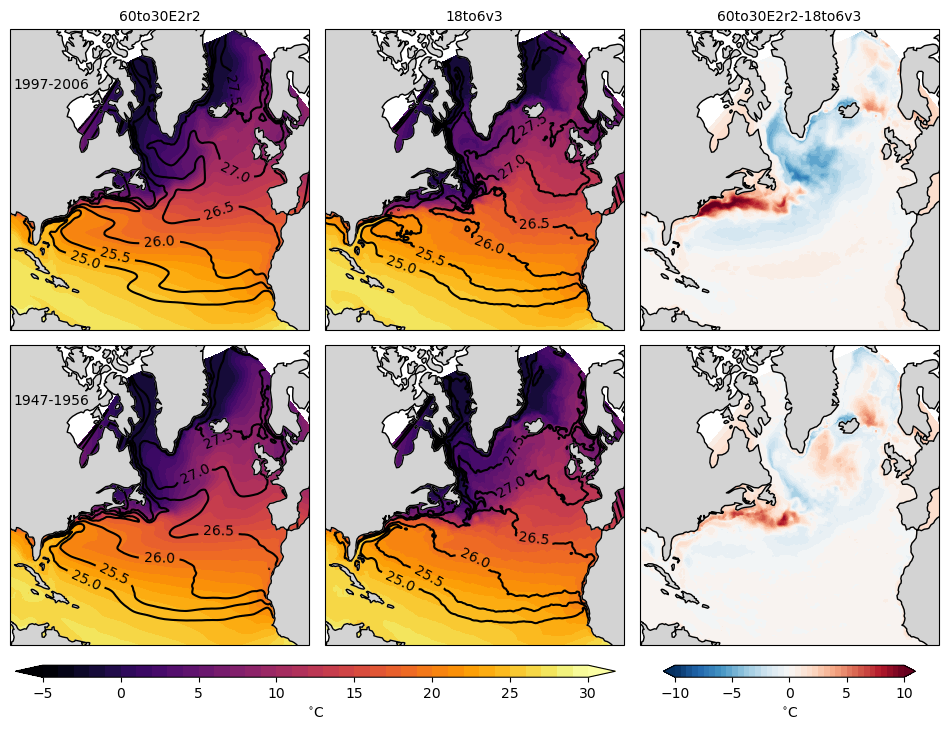

In [4]:
# Plot surface temperature
varname, units, clims = 'temperature', '$^{\circ}$C', [-5, 30, 1, 5, 10, 0.5, 5]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='inferno')

**Surface salinity**

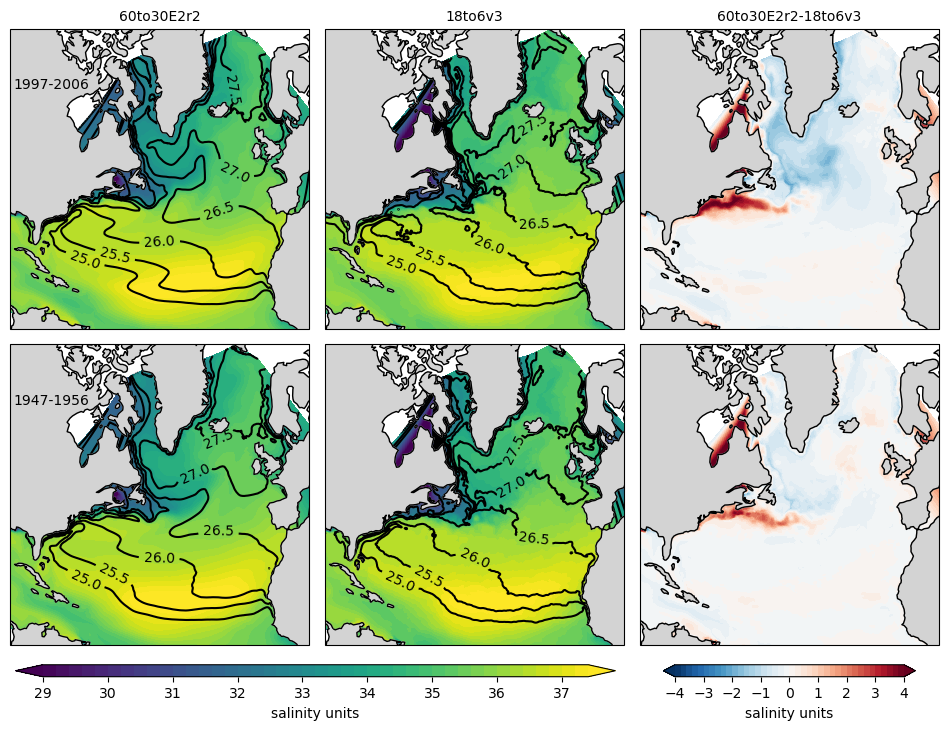

In [5]:
# Plot surface salinity
varname, units, clims = 'salinity', 'salinity units', [29, 37.5, 0.2, 1, 4, 0.2, 1]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='viridis')

***

### Heat fluxes (DJF)

**Longwave heat flux up**

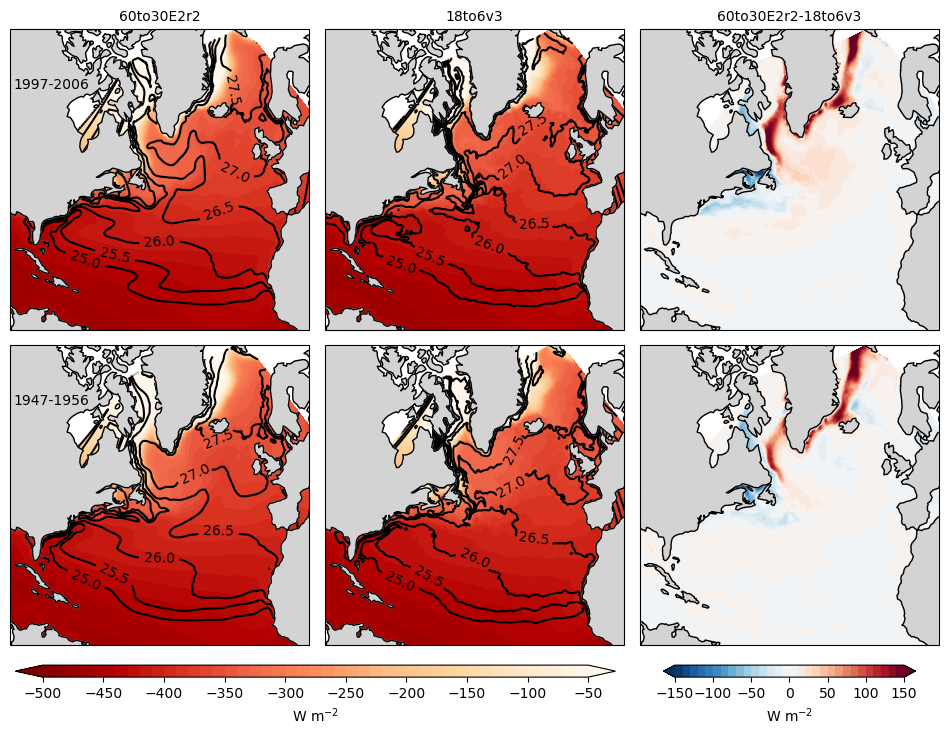

In [6]:
# Plot long wave heat flux
varname, units, clims = 'longWaveHeatFluxUp', 'W m$^{-2}$', [-500, -50, 10, 50, 150, 10, 50]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='OrRd_r')

**Sensible heat flux**

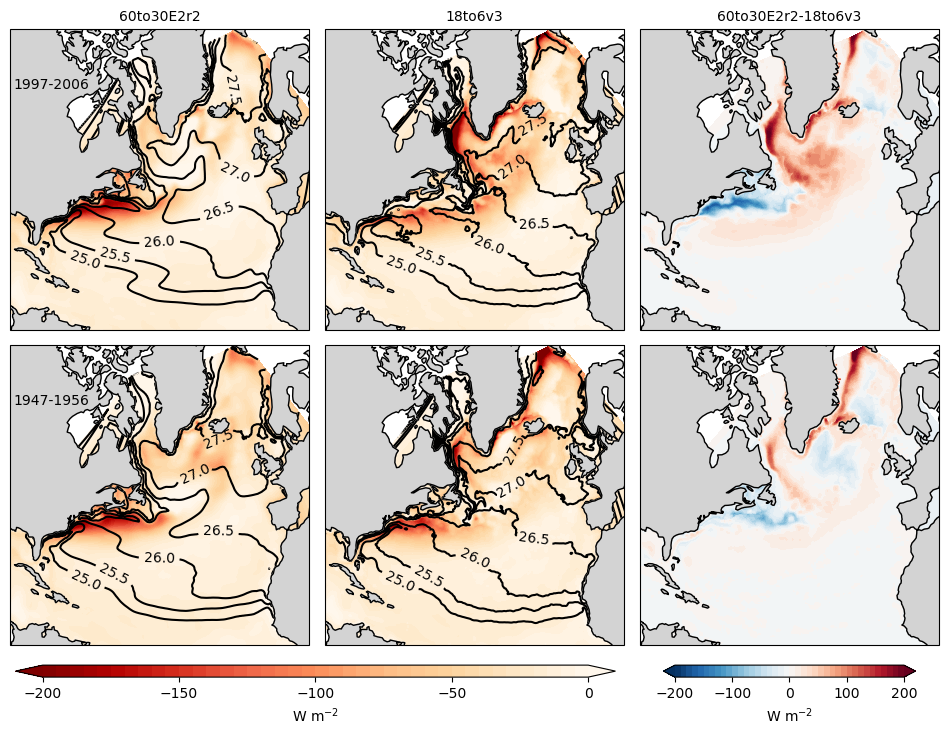

In [7]:
# Plot sensible heat flux
varname, units, clims = 'sensibleHeatFlux', 'W m$^{-2}$', [-200, 0, 5, 50, 200, 10, 100]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='OrRd_r')

**Latent heat flux**

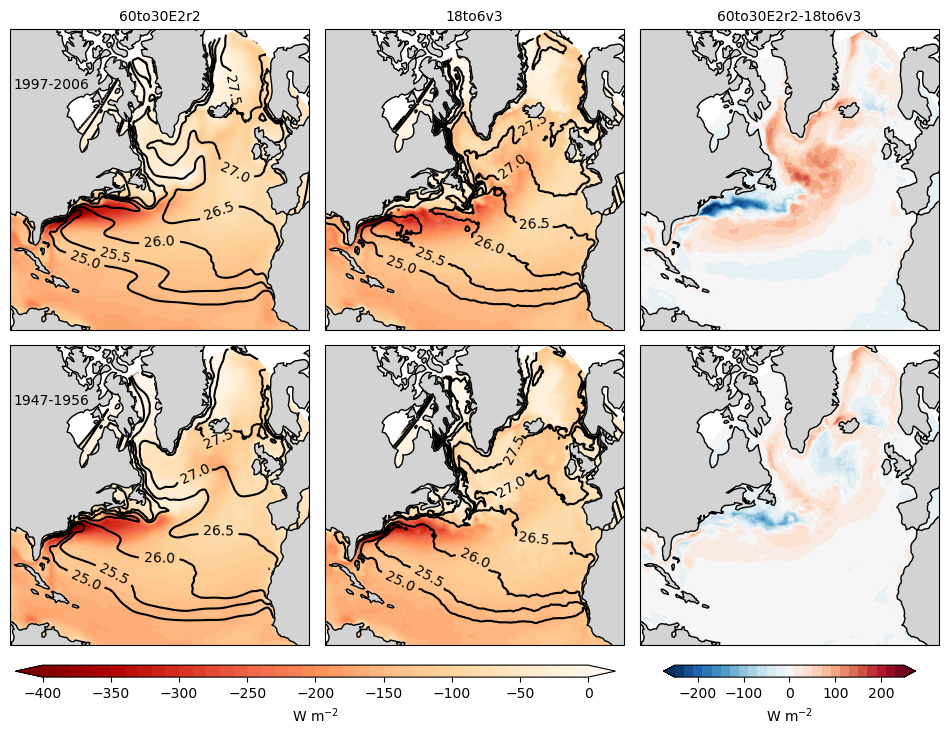

In [8]:
# Plot latent heat flux
varname, units, clims = 'latentHeatFlux', 'W m$^{-2}$', [-400, 0, 10, 50, 250, 20, 100]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='OrRd_r')

**Sea ice heat flux**

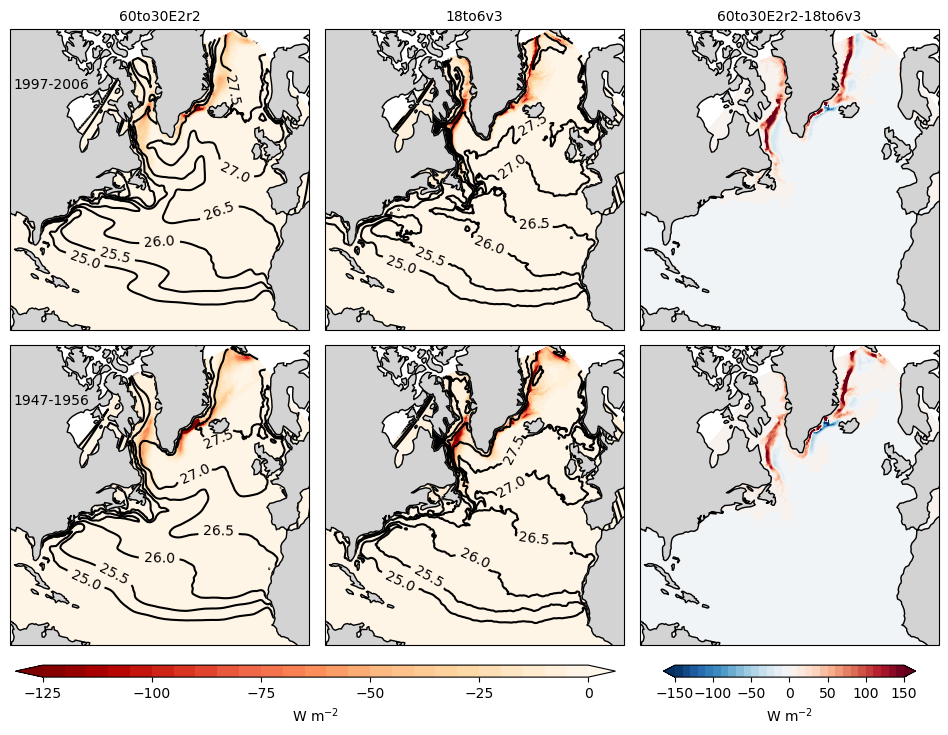

In [9]:
# Plot sea ice heat flux
varname, units, clims = 'seaIceHeatFlux', 'W m$^{-2}$', [-125, 0, 5, 25, 150, 10, 50]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', clims=clims, cmap='OrRd_r')

***

### Freshwater fluxes (DJF)

**Evaporation flux**

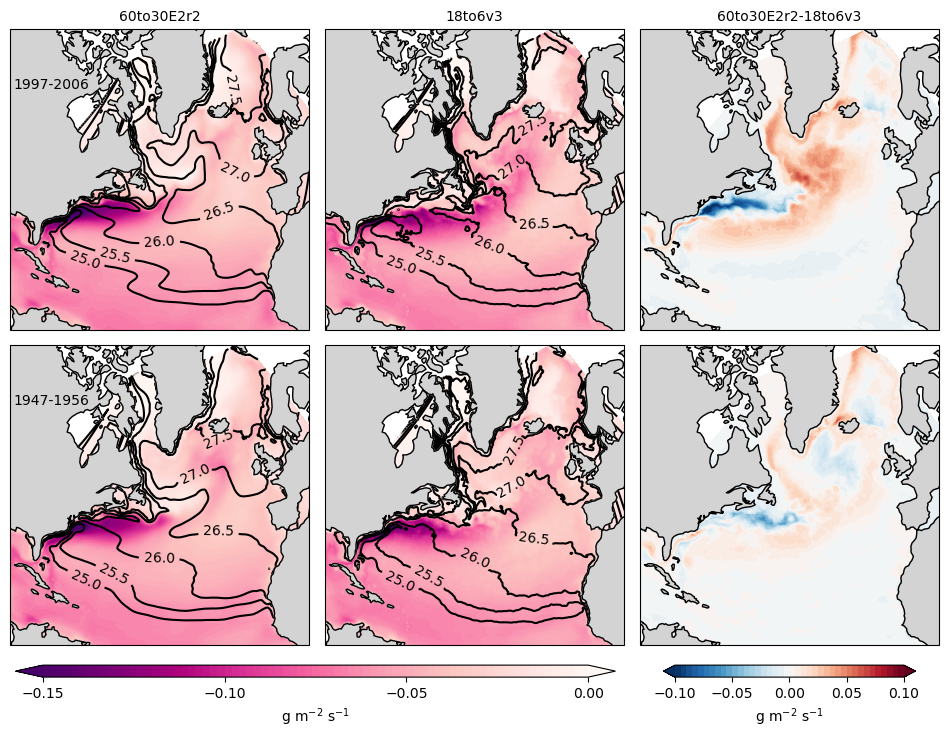

In [10]:
# Plot evaporation flux
varname, units, clims = 'evaporationFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0, 0.002, 0.05, 0.1, 0.005, 0.05]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', scale=1e3, clims=clims, cmap='RdPu_r')

**Sea ice freshwater flux**

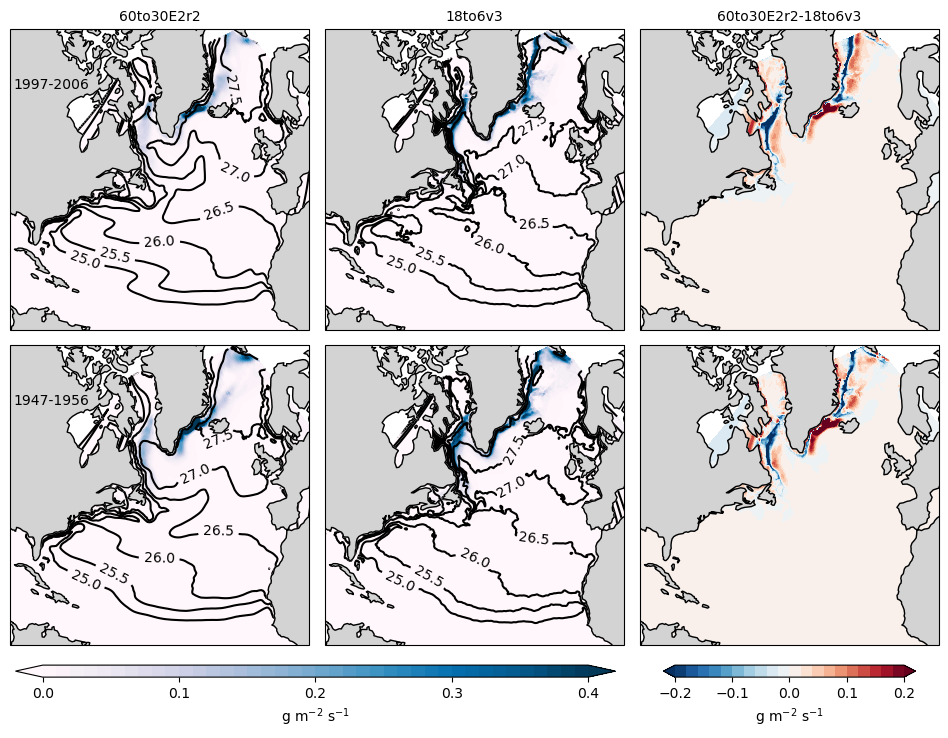

In [11]:
# Plot sea ice freshwater flux
varname, units, clims = 'seaIceFreshWaterFlux', 'g m$^{-2}$ s$^{-1}$', [0, 0.4, 0.01, 0.1, 0.2, 0.02, 0.1]
fig, axs = viz.plot_variable_spatial(plotvars, lon, lat, varname, units, season='DJF', scale=1e3, clims=clims, cmap='PuBu')